# Sumarised results from numerical experiments

In [1]:
import numpy as np
from os import listdir
import matplotlib.pyplot as plt
from signals import *
from plots import *
from pylab import rcParams
rcParams['figure.figsize'] = 5, 2.5

In [2]:
def draw_plot(ax, data, edge_color, fill_color):
    bp = ax.boxplot(data, whis=[0, 95], patch_artist=True)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)  

In [3]:
def my_degrees(rad):
    return rad*180/np.pi

To generate experiment results, run for example:

`exec(open("surface-tests.py").read())`

This notebook only reads the results from files and generates plots.

In [4]:
# listdir()

In [18]:
# results = np.empty((2,4,10))
all_errors = np.zeros((4,11,100*13))

max_degree = 10

for n in range(3,max_degree):
    for nl in [0,1,2,3]:
        code1 = str(n)+"_1_"+str(nl)
        code2 = str(n)+"_1_"+"{0:.2f}".format(nl)
#         nsr = np.load('nsr_'+code+'.npy')
        try:
            errors = np.load('results/errors_'+code1+'.npy')
        except:
            errors = np.load('results/errors_'+code2+'.npy')
#         params = np.load('params_'+code+'.npy')
#         results[0,nl,n] = np.degrees(np.percentile(errors, q=50))
#         results[1,nl,n] = np.degrees(np.percentile(errors, q=95))
        errors = errors.flatten()
        all_errors[nl,n,:] = errors

all_errors = my_degrees(all_errors)
if np.isnan(all_errors).any():
    print("We have NaNs :(")
    print(str(np.count_nonzero(np.isnan(all_errors))))
all_errors[np.isnan(all_errors)]=20

We have NaNs :(
1


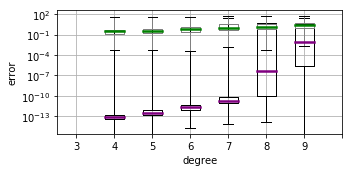

In [19]:
flierprops1 = dict(marker='+', markeredgecolor='purple')
medianprops1 = dict(linewidth=2.5, color='purple')
gp1 = dict(color='black')
flierprops2 = dict(marker='+', markeredgecolor='green')
medianprops2 = dict(linewidth=2.5, color='green')
gp2 = dict(color='gray', markeredgecolor='grayt')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.boxplot(all_errors[0,2:max_degree-1,:].T, whis=[0, 100], flierprops=flierprops1, medianprops=medianprops1, boxprops=gp1, whiskerprops=gp1)
ax.boxplot(all_errors[2,2:max_degree-1,:].T, whis=[0, 100], flierprops=flierprops2, medianprops=medianprops2, boxprops=gp2, whiskerprops=gp2)
ax.set_yscale('log')
plt.xticks(range(1,max_degree-1),range(3,max_degree))
plt.xlabel("degree")
plt.ylabel("error")
plt.grid()
plt.tight_layout()
plt.show()
fig.savefig('degree.pdf')


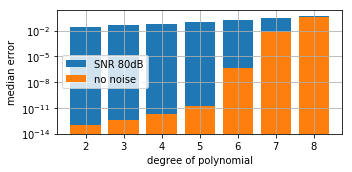

In [20]:
fig = plt.figure()
plt.yscale('log')
plt.bar(list(range(2,max_degree-1)), np.median(all_errors[3,3:max_degree,:],1), bottom=1e-14)
plt.bar(list(range(2,max_degree-1)), np.median(all_errors[0,3:max_degree,:],1), bottom=1e-14)
# ax.set_yscale('log')
plt.xlabel("degree of polynomial")
plt.ylabel("median error")
plt.legend(["SNR 80dB", "no noise"], loc=6)
plt.grid()
plt.tight_layout()
plt.show()
fig.savefig('degree_bar.pdf')

0.16615384615384615
2.4819779983968133


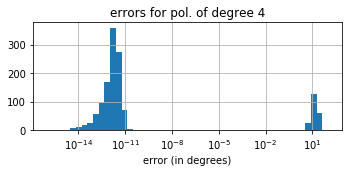

In [8]:
fig = plt.figure()
plt.hist(all_errors[0,5,:],  bins=np.logspace(-16, 2, 50))
print(np.count_nonzero(all_errors[0,5,:] > 1e-10)/len(all_errors[0,5,:]))
print(np.mean(all_errors[0,5,:]))
# plt.yscale('log', nonposy='clip')
plt.xscale('log', nonposx='clip')
plt.title("errors for pol. of degree 4")
plt.xlabel("error (in degrees)")
plt.grid()
plt.tight_layout()
plt.show()
fig.savefig('two_modes.pdf')

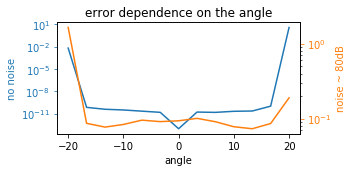

In [9]:
a = np.linspace(-20,20, 13)

fig2, ax2 = plt.subplots()
angle_err = all_errors[0,3:10,:]
angle_err = np.median(angle_err.reshape((700, 13)),0)
ax2.semilogy(a, angle_err, 'C0-')
ax2.set_xlabel('angle')
ax2.set_ylabel('no noise', color='C0')
ax2.tick_params('y', colors='C0')
plt.title("error dependence on the angle")

ax3 = ax2.twinx()
angle_err = all_errors[3,3:10,:]
angle_err = np.median(angle_err.reshape((700, 13)),0)
ax3.semilogy(a, angle_err, 'C1-')
ax3.set_ylabel('noise ~ 80dB', color='C1')
ax3.tick_params('y', colors='C1')
# plt.grid()
plt.tight_layout()
fig2.savefig("angle.pdf")
    
# plt.plot(a, np.abs(a))
plt.show()

In [10]:
results = np.empty((2,4,5,5))
all_errors = np.empty((4,5,5,100*13))
all_nsr = np.empty((4,5,5,100*13))

for (overs, idx) in zip([1,2,4,8], range(4)):
    for n in range(4,5):
        for nl in range(5):
            code = str(n)+"_"+str(overs)+"_"+str(nl)
            nsr = np.load('results/nsr_'+code+'.npy')
            errors = np.load('results/errors_'+code+'.npy')
    #         params = np.load('params_'+code+'.npy')
            errors[np.isnan(errors)]=1
            results[0,idx,nl,n] = np.degrees(np.percentile(errors, q=50))
            results[1,idx,nl,n] = np.degrees(np.mean(errors.flatten()))
            all_nsr[idx,nl,n,:] = nsr.flatten()
            all_errors[idx,nl,n,:] = errors.flatten()

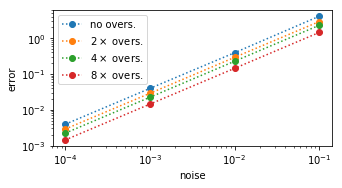

In [11]:
nse = 10.0**(-np.array(range(1,5)))
fig = plt.figure()
# plt.loglog(nse,results[0,:,1:,4].T, '--^')
plt.loglog(nse,results[0,:,1:,4].T, ':o')
# plt.semilogy(range(4),results[1,:,3:5], '^')
plt.xlabel("noise")
plt.ylabel("error")
plt.legend([r"no overs.",r"$2\times $ overs.",r"$4\times $ overs.", r"$8\times $ overs."], loc=2)
plt.show()
fig.savefig('oversampling.pdf')

In [12]:
n_pow = np.concatenate([np.arange(-2.46,-1.05, 0.07037), np.linspace(-1, 9, 199)])
n_len = len(n_pow)

results = np.empty((2,4,n_len))
all_errors = np.empty((4,n_len,100*13))
all_power = np.empty((4,n_len,100*13))
n = 5



for (overs, idx) in zip([1,2,4,8], range(4)):
    for (nl, n_idx) in zip(n_pow, range(len(n_pow))):
        code = str(n)+"_"+str(overs)+"_"+"{0:.2f}".format(nl)
        power = np.load('results/pow_'+code+'.npy')
        errors = np.load('results/errors_'+code+'.npy')
#         params = np.load('params_'+code+'.npy')
        errors[np.isnan(errors)]=1
        results[0,idx, n_idx] = np.degrees(np.percentile(errors, q=50))
        results[1,idx, n_idx] = np.degrees(np.mean(errors.flatten()))
        all_power[idx,n_idx,:] = power.flatten()
        all_errors[idx,n_idx,:] = errors.flatten()

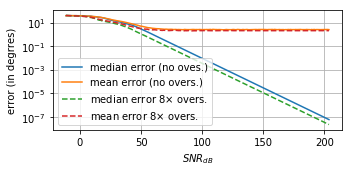

In [13]:
# calculate SNR:

snr = 10*(np.log(np.mean(all_power.flatten()))+2*n_pow)
beg = 10
fig = plt.figure()
# plt.loglog(nse,results[0,:,1:,4].T, '--^')
plt.semilogy(snr[beg:],results[:,0,beg:].T)
plt.semilogy(snr[beg:],results[:,3,beg:].T, "--")
# plt.semilogy(range(4),results[1,:,3:5], '^')
plt.xlabel(r"$SNR_{dB}$")
plt.ylabel("error (in degrres)")
plt.legend([r"median error (no oves.)",r"mean error (no overs.)", r"median error 8$\times$ overs.",r"mean error 8$\times$ overs."], loc='best')
plt.grid()
plt.tight_layout()
plt.show()
fig.savefig('snr2.pdf')